In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import json

In [2]:
first_step_folder = "../01_GeneratePureSpectrums/"
sims_filename = first_step_folder+"sims_01.csv"
sims_df = pd.read_csv(sims_filename)
pure_spec_sims_df = sims_df

pickle_files = first_step_folder+'specs/'+sims_df['filename']+'.pkl'
soil_resolutions = sims_df['soil_resolution']
res_info_files = first_step_folder+'ResInfo/res_info_'+soil_resolutions+'.json'
res_infos = [json.load(open(res_info_file, 'r')) for res_info_file in res_info_files]
pure_res_infos = res_infos

In [3]:
elem_maps_folder = first_step_folder+'ElemMaps/'
elem_maps_files = elem_maps_folder+'ELEMS_'+sims_df['filename']+'.csv'
elem_maps = [pd.read_csv(elem_map_file) for elem_map_file in elem_maps_files]
pure_elem_maps = elem_maps
elem_ids = [pure_elem_maps[i][pure_elem_maps[i].columns[0]].to_list() for i in range(len(pure_elem_maps))]
avg_elem_samples = [pure_elem_maps[i][res_infos[i]['cell_ids']].mean(axis=1) for i in range(len(pure_elem_maps))]
avg_carbon_portion = [avg_elem_samples[i][elem_ids[i].index(6000)] for i in range(len(pure_elem_maps))]

pure_avg_carbon_portion = np.array(avg_carbon_portion)

In [4]:
specs_files = first_step_folder+'specs/'+sims_df['filename']+'.pkl'
specs = [pickle.load(open(specs_file, 'rb')) for specs_file in specs_files]
tally_t = 1
binss = [td[0][tally_t][-2] for td in specs]
tallies = [td[1][tally_t] for td in specs]

In [5]:
detector_tally = np.array(tallies)
detector_tally = detector_tally.squeeze()

In [6]:
pure_bins = np.array(binss)
pure_tally = np.array(detector_tally)

In [8]:
third_step_folder = "../03_CommonSoilData/"
sims_filename = third_step_folder+"sims_03.csv"
sims_df = pd.read_csv(sims_filename)
levs_sims_df = sims_df.copy()

pickle_files = third_step_folder+'specs/'+sims_df['filename']+'.pkl'
soil_resolutions = sims_df['soil_resolution']
res_info_files = third_step_folder+'ResInfo/res_info_'+soil_resolutions+'.json'
res_infos = [json.load(open(res_info_file, 'r')) for res_info_file in res_info_files]
levs_res_infos = res_infos

In [9]:
elem_maps_folder = third_step_folder+'ElemMaps/'
elem_maps_files = elem_maps_folder+'ELEMS_'+sims_df['filename']+'.csv'
elem_maps = [pd.read_csv(elem_map_file) for elem_map_file in elem_maps_files]
pure_elem_maps = elem_maps
elem_ids = [pure_elem_maps[i][pure_elem_maps[i].columns[0]].to_list() for i in range(len(pure_elem_maps))]
avg_elem_samples = [pure_elem_maps[i][res_infos[i]['cell_ids']].mean(axis=1) for i in range(len(pure_elem_maps))]
avg_carbon_portion = [avg_elem_samples[i][elem_ids[i].index(6000)] for i in range(len(pure_elem_maps))]

levs_avg_carbon_portion = np.array(avg_carbon_portion)

In [10]:
specs_files = third_step_folder+'specs/'+sims_df['filename']+'.pkl'
specs = [pickle.load(open(specs_file, 'rb')) for specs_file in specs_files]
tally_t = 1
binss = [td[0][tally_t][-2] for td in specs]
tallies = [td[1][tally_t] for td in specs]

In [11]:
detector_tally = np.array(tallies)
detector_tally = detector_tally.squeeze()

In [12]:
lev_bins = np.array(binss)
lev_tally = np.array(detector_tally)

In [13]:
exp_df = pd.concat([pure_spec_sims_df, levs_sims_df], axis=0, ignore_index=True)

In [14]:
exp_df['avg_carbon_portion'] = np.concatenate([pure_avg_carbon_portion, levs_avg_carbon_portion], axis=0)

In [15]:
exp_df['spectrum_bins'] = [b for b in np.concatenate([pure_bins, lev_bins], axis=0)]
exp_df['spectrum_tally'] = [t for t in np.concatenate([pure_tally, lev_tally], axis=0)]

In [26]:
exp_df.to_pickle("ExpirementData.pkl")

In [30]:
exp_df

,soil_resolution,function,id,filename,avg_carbon_portion,spectrum_bins,spectrum_tally
0,7x7x7,Si,1000,7x7x7_Si_001000,0.000,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[0.000840412, 6.85e-07, 0.000600802, 0.0004206..."
1,7x7x7,Al,1001,7x7x7_Al_001001,0.000,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[0.00106409, 8.95e-07, 0.0007947, 0.000577543,..."
2,7x7x7,H,1002,7x7x7_H_001002,0.000,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[1.4694e-05, 1.1e-08, 1.1009e-05, 7.965e-06, 3..."
3,7x7x7,Na,1003,7x7x7_Na_001003,0.000,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[0.00075968, 6.04e-07, 0.000541638, 0.00038162..."
4,7x7x7,O,1004,7x7x7_O_001004,0.000,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[1.5841e-05, 1.1e-08, 1.1767e-05, 8.406e-06, 4..."
5,7x7x7,Fe,1005,7x7x7_Fe_001005,0.000,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[0.00164398, 1.489e-06, 0.00133006, 0.00104729..."
6,7x7x7,Mg,1006,7x7x7_Mg_001006,0.000,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[0.000912043, 7.63e-07, 0.000653511, 0.0004585..."
7,7x7x7,C,1007,7x7x7_C_001007,1.000,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[0.000854398, 6.88e-07, 0.000617626, 0.0004379..."
8,7x7x7,SiO2,1008,7x7x7_SiO2_001008,0.000,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[0.000864266, 6.93e-07, 0.000609096, 0.0004213..."
9,7x7x7,Al2O3,1009,7x7x7_Al2O3_001009,0.000,"[0.0, 1e-05, 0.00904482, 0.0180796, 0.0271145,...","[0.000963536, 8.15e-07, 0.00069372, 0.00048862..."


In [19]:
_spec = {}
_s = np.array(exp_df['spectrum_tally'].values.tolist())
for _, func in enumerate(exp_df['filename']):
    # print(func)
    _spec[func] = _s[_]

detector_df = pd.DataFrame.from_dict(_spec)

In [27]:
si_window = [3.35, 3.55]
c_window=[3.35, 3.55]
detector_bins = exp_df['spectrum_bins'].values[0]

In [28]:
detector_df['bins'] = detector_bins

In [29]:
detector_df.to_pickle("DetectorReadings.pkl")

In [17]:
import CortesAnalysisPackage as cap

In [22]:
fitting_df, c_lines_df, si_lines_df = cap.classical.PerpendicularDrop(
    df=detector_df, 
    bins=detector_bins,
    c_window=c_window,
    si_window=si_window,
    )



/home/jac2462@uta.edu/Documents/USDASummer2025/Steps/04_ApplyAnalysis/CortesAnalysisPackage/classical/__init__.py:105: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  c_lines_df[df.columns[i]+" baseline"] = c_baseline_lines[i]
/home/jac2462@uta.edu/Documents/USDASummer2025/Steps/04_ApplyAnalysis/CortesAnalysisPackage/classical/__init__.py:106: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  c_lines_df[df.columns[i]+" peak"] = c_peak_lines[i]
/home/jac2462@uta.edu/Documents/USDASummer2025/Steps/04_ApplyAnalysis/CortesAnalysisPackage/

In [24]:
detector_df

,7x7x7_Si_001000,7x7x7_Al_001001,7x7x7_H_001002,7x7x7_Na_001003,7x7x7_O_001004,7x7x7_Fe_001005,7x7x7_Mg_001006,7x7x7_C_001007,7x7x7_SiO2_001008,7x7x7_Al2O3_001009,...,7x7x7_C_0060_Feldspar_Fill_003001,7x7x7_C_0120_Feldspar_Fill_003002,7x7x7_C_0180_Feldspar_Fill_003003,7x7x7_C_0240_Feldspar_Fill_003004,7x7x7_C_0300_Feldspar_Fill_003005,7x7x7_C_0360_Feldspar_Fill_003006,7x7x7_C_0420_Feldspar_Fill_003007,7x7x7_C_0480_Feldspar_Fill_003008,7x7x7_C_0540_Feldspar_Fill_003009,7x7x7_C_0600_Feldspar_Fill_003010
0,8.404120e-04,1.064090e-03,1.469400e-05,7.596800e-04,1.584100e-05,1.643980e-03,9.120430e-04,8.543980e-04,8.642660e-04,9.635360e-04,...,8.790070e-04,8.784680e-04,8.774330e-04,8.767580e-04,8.752060e-04,8.739630e-04,8.732300e-04,8.723020e-04,8.715770e-04,8.708300e-04
1,6.850000e-07,8.950000e-07,1.100000e-08,6.040000e-07,1.100000e-08,1.489000e-06,7.630000e-07,6.880000e-07,6.930000e-07,8.150000e-07,...,7.440000e-07,7.340000e-07,7.370000e-07,7.580000e-07,7.510000e-07,7.570000e-07,7.450000e-07,7.190000e-07,7.410000e-07,7.270000e-07
2,6.008020e-04,7.947000e-04,1.100900e-05,5.416380e-04,1.176700e-05,1.330060e-03,6.535110e-04,6.176260e-04,6.090960e-04,6.937200e-04,...,6.221050e-04,6.211590e-04,6.209900e-04,6.203820e-04,6.204520e-04,6.197560e-04,6.193290e-04,6.188660e-04,6.182240e-04,6.173560e-04
3,4.206310e-04,5.775430e-04,7.965000e-06,3.816200e-04,8.406000e-06,1.047290e-03,4.585130e-04,4.379550e-04,4.213330e-04,4.886230e-04,...,4.328740e-04,4.324900e-04,4.322310e-04,4.319520e-04,4.313280e-04,4.305720e-04,4.301710e-04,4.308710e-04,4.301800e-04,4.298310e-04
4,2.027580e-04,2.917970e-04,3.990000e-06,1.885240e-04,4.226000e-06,5.645540e-04,2.268500e-04,2.148290e-04,1.984800e-04,2.372060e-04,...,2.063180e-04,2.062770e-04,2.062000e-04,2.059570e-04,2.056920e-04,2.055310e-04,2.057890e-04,2.060010e-04,2.059770e-04,2.056070e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930,2.780000e-07,2.610000e-07,3.000000e-09,1.930000e-07,4.000000e-09,1.830000e-07,4.100000e-07,2.230000e-07,2.470000e-07,2.300000e-07,...,2.600000e-07,2.510000e-07,2.400000e-07,2.510000e-07,2.470000e-07,2.490000e-07,2.470000e-07,2.420000e-07,2.380000e-07,2.410000e-07
931,3.110000e-07,2.640000e-07,2.000000e-09,2.010000e-07,3.000000e-09,2.030000e-07,4.150000e-07,2.240000e-07,2.320000e-07,2.300000e-07,...,2.380000e-07,2.310000e-07,2.320000e-07,2.500000e-07,2.500000e-07,2.420000e-07,2.300000e-07,2.370000e-07,2.330000e-07,2.310000e-07
932,2.910000e-07,2.590000e-07,3.000000e-09,2.220000e-07,6.000000e-09,1.770000e-07,4.260000e-07,2.420000e-07,2.380000e-07,2.310000e-07,...,2.370000e-07,2.350000e-07,2.390000e-07,2.330000e-07,2.320000e-07,2.360000e-07,2.400000e-07,2.450000e-07,2.500000e-07,2.600000e-07
933,2.950000e-07,2.370000e-07,4.000000e-09,2.070000e-07,4.000000e-09,1.660000e-07,3.930000e-07,2.140000e-07,2.250000e-07,2.170000e-07,...,2.320000e-07,2.360000e-07,2.270000e-07,2.170000e-07,2.240000e-07,2.150000e-07,2.130000e-07,2.100000e-07,2.160000e-07,2.290000e-07


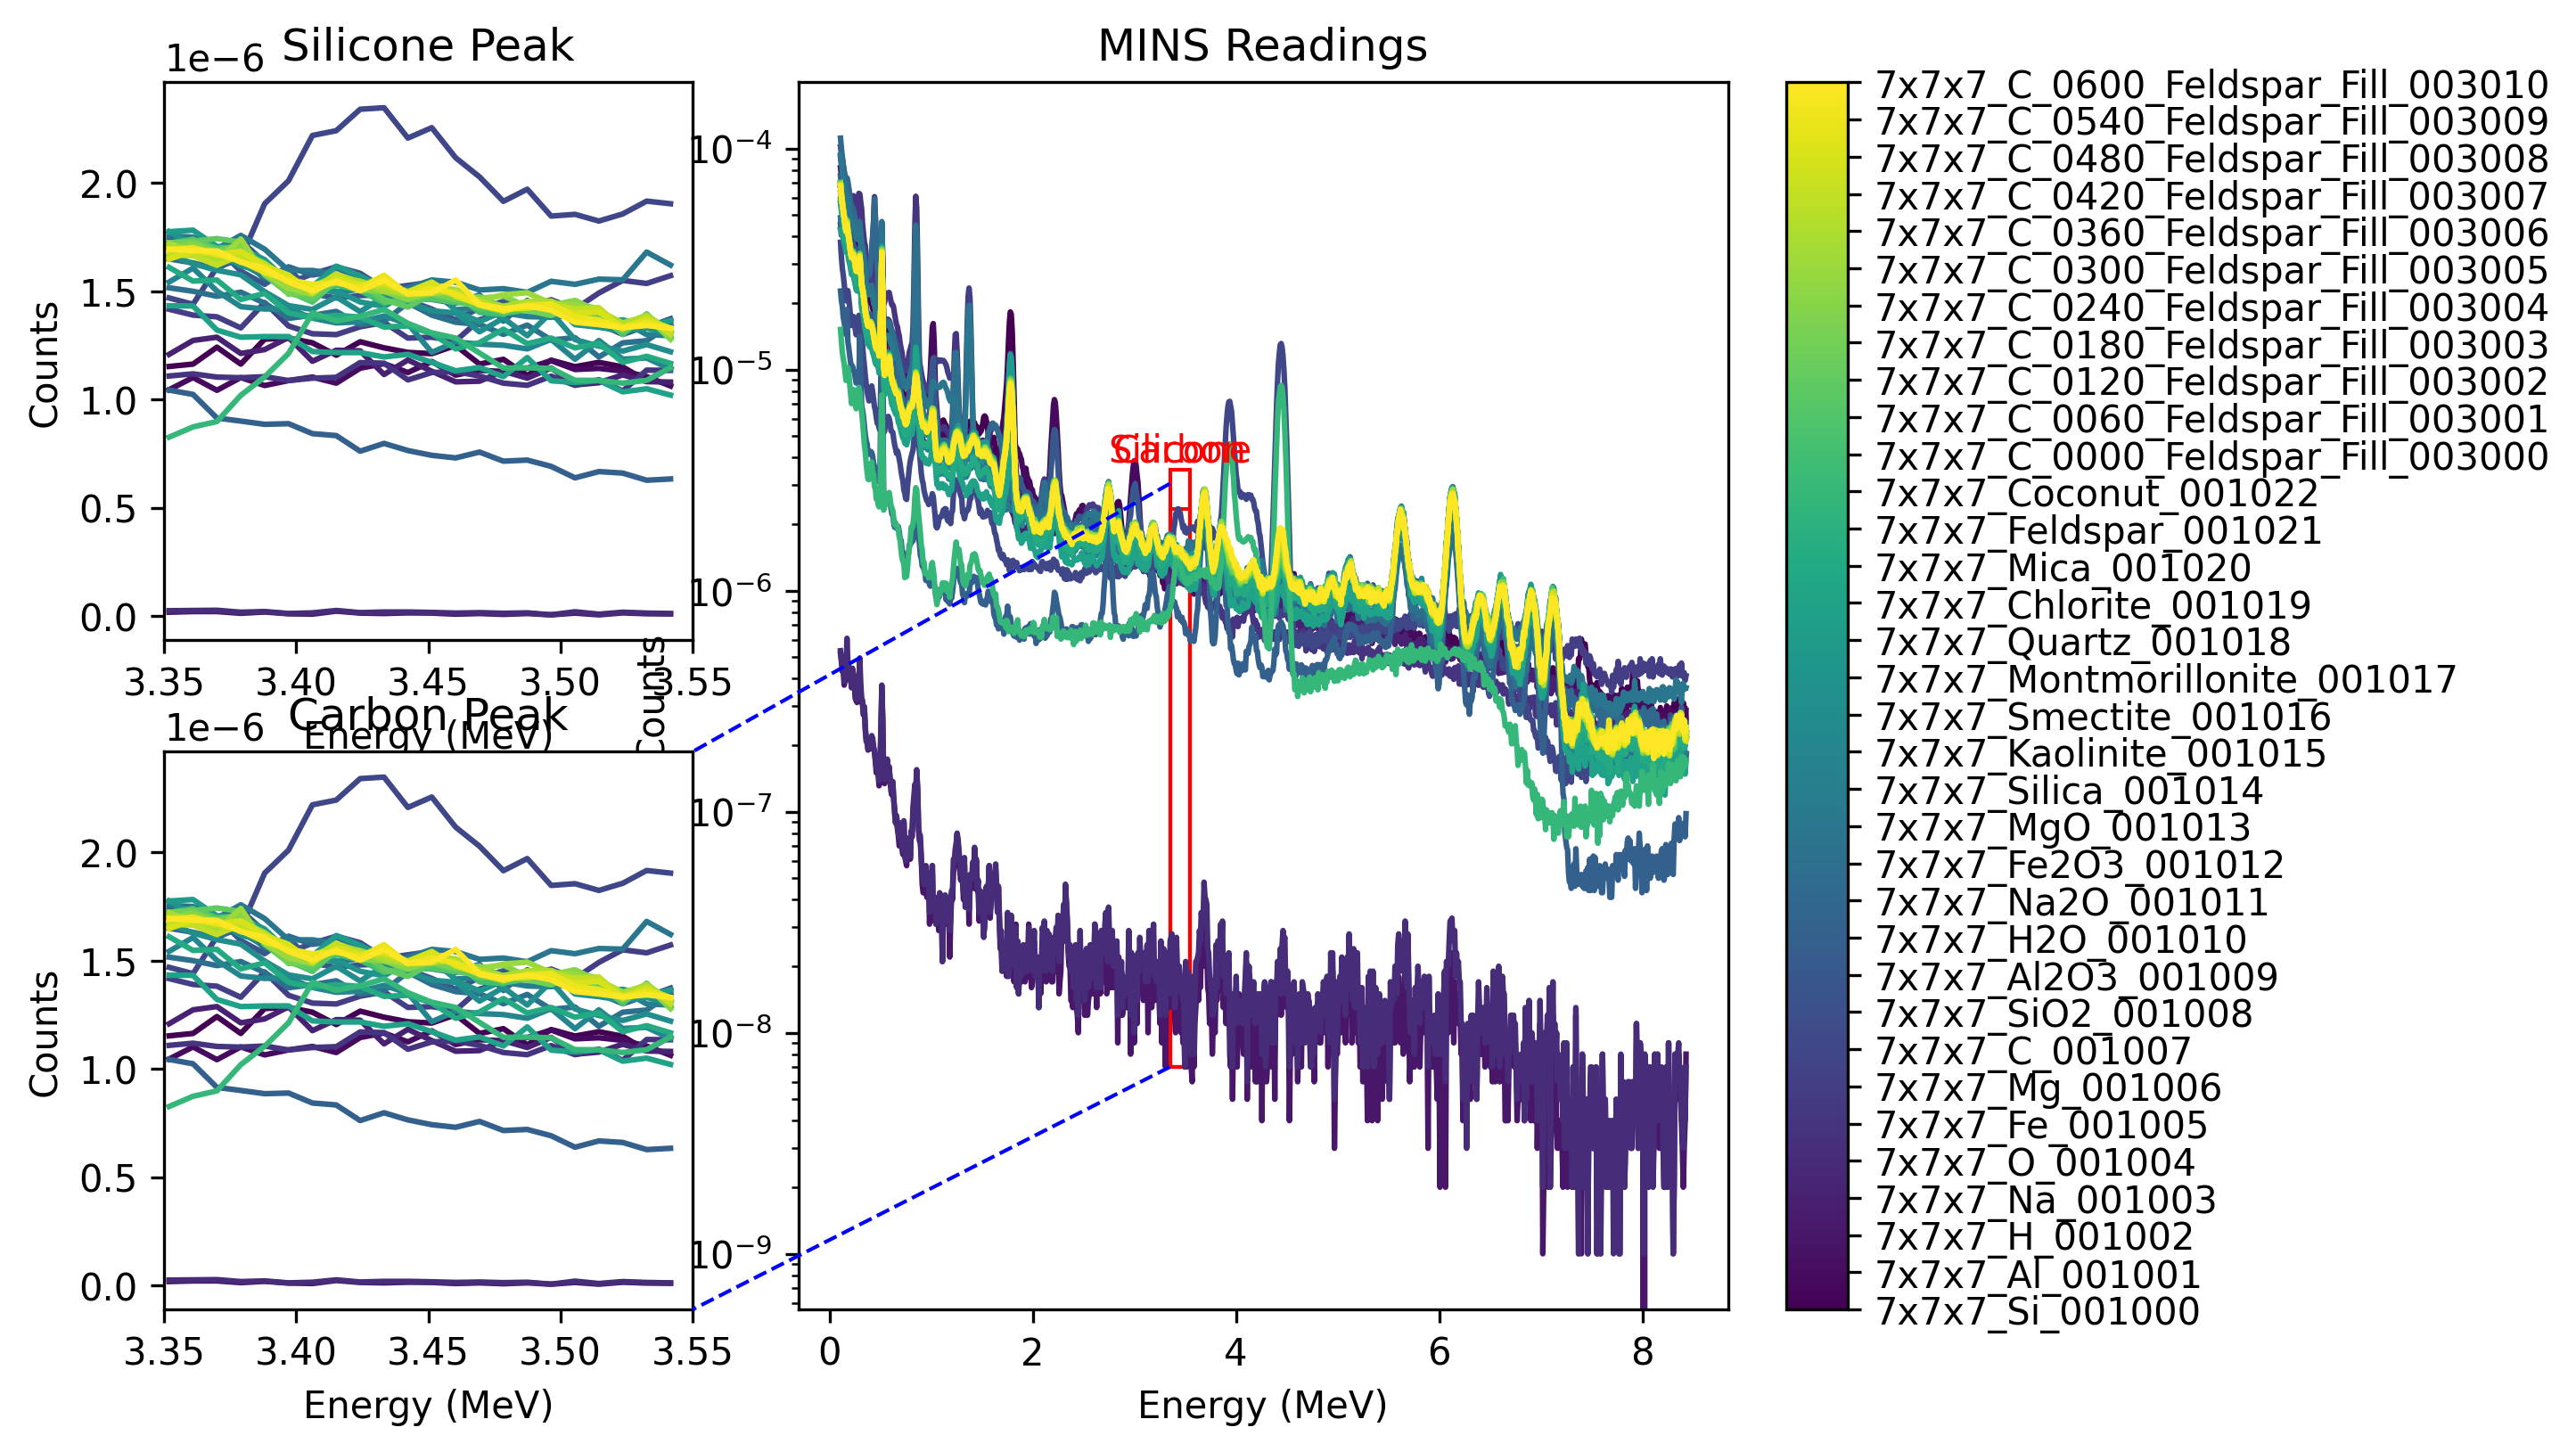

In [23]:
cap.plot.multi_spectrum(
    df=detector_df,
    bins=detector_bins,
    c_window=c_window,
    si_window=si_window,
    show=True,
    )